# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from base_models import BaseModel
from model_creator import Optimizer, MTLApproach
from model_evaluator import DataSource, DataPredSelection

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 50 epochs - using second approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups. Removing rotation from operations of data augmentation' + \
            ' and using minor shift (width and height).',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '50 epochs', 'handcrafted_2'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'approach': MTLApproach.HAND_2,
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': False,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 2,
        'early_stopping': 50,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 9768
Process ID: 16918
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 50 '
                               'epochs - using second approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups. '
                               'Removing rotation from operations of data '
                               'augmentation and using minor shift (width and '
                               'height).',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '50 epochs',
  

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3607 (73.19%)
N_TRAIN_NOT_COMP: 1321 (26.81%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 420 (76.78%)
N_VALIDATION_NOT_COMP: 127 (23.22%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 215 (74.65%)
N_TEST_NOT_COMP: 73 (25.35%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: ROTATION
N_TRAIN_COMP: 3716 (75.41%)
N_TRAIN_NOT_COMP: 1212 (24.59%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 410 (74.95%)
N_VALIDATION_NOT_COMP: 137 (25.05%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 208 (72.22%)
N_TEST_NOT_COMP: 80 (27.78%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: L_AWAY
N_TRAIN_COMP: 3375 (68.49%)
N_TRAIN_NOT_COMP: 1553 (31.51%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 382 (69.84%)
N_VALIDATION_NOT_COMP: 165 (30.16%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 201 (69.79%)
N_TEST_NOT_COMP: 87 (30.21%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: EYES_CLOSED
N_TRAIN_COMP: 3887 (78.88%)
N_TRAIN_NOT_COMP: 1041 (21.12%)
N_TRAIN_D

# Create Model

In [10]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


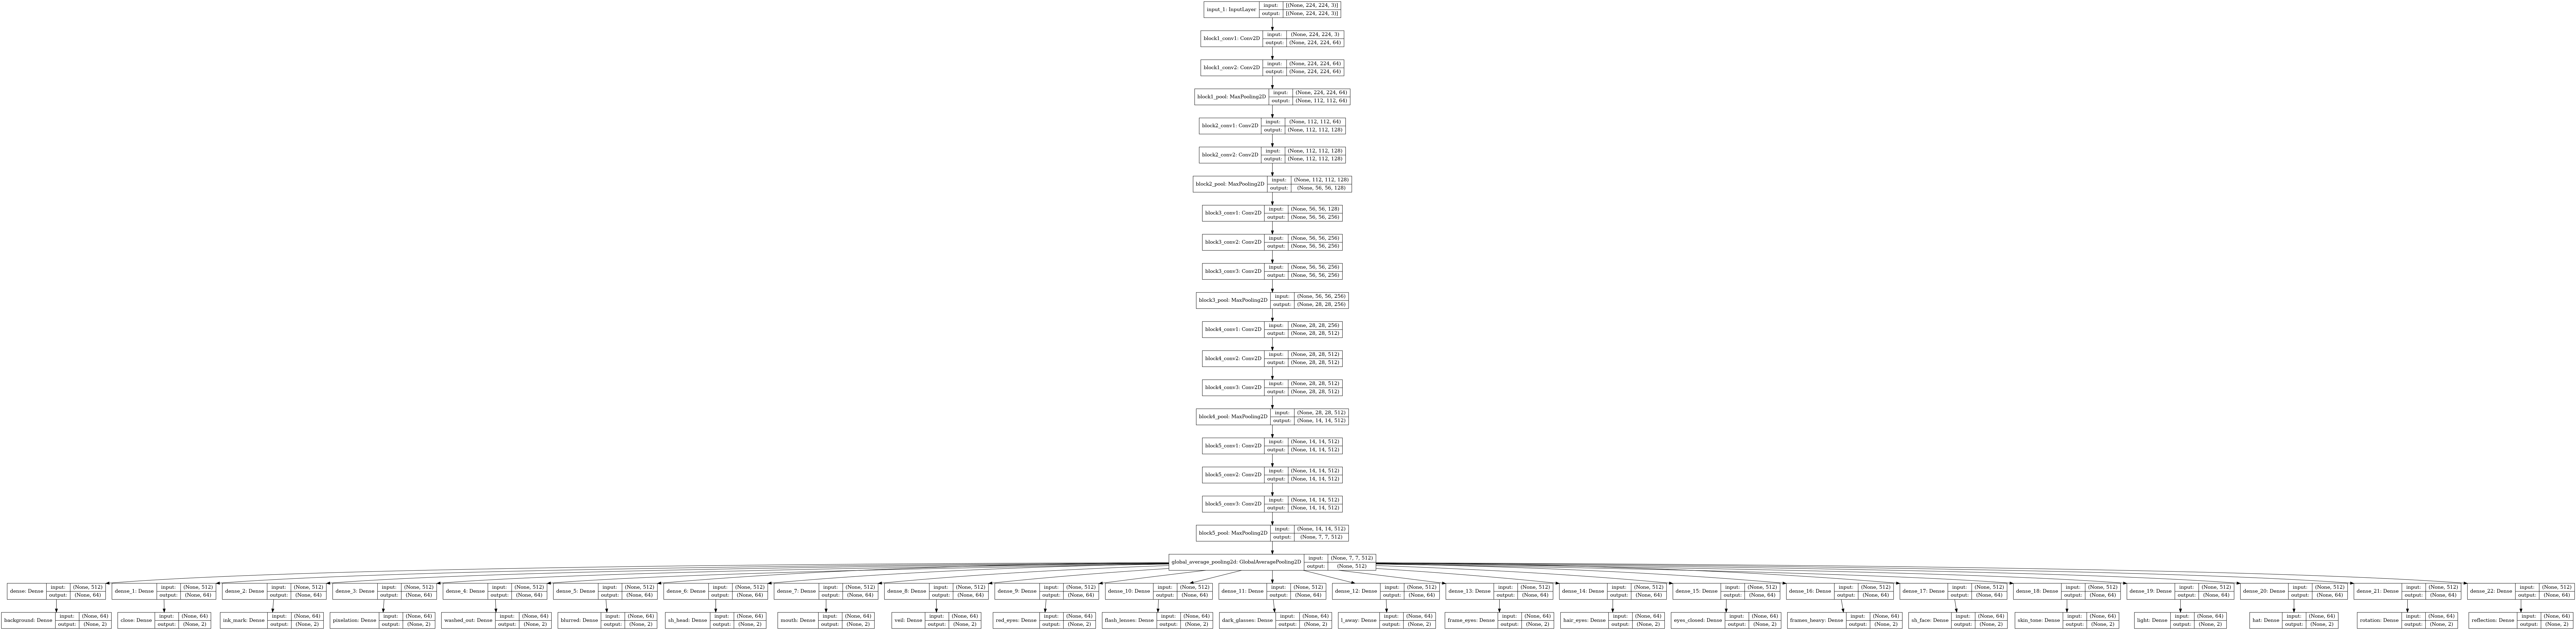

In [11]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model_2.png")

In [12]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 15,472,814
  .. Trainable params: 758,126
  .. Non-trainable params: 14,714,688
Epoch 1/2
154/154 [==============================] - 419s 3s/step - loss: 1.1845 - background_loss: 0.7566 - close_loss: 0.6582 - ink_mark_loss: 0.7101 - pixelation_loss: 0.6334 - washed_out_loss: 0.1697 - blurred_loss: 0.5070 - sh_head_loss: 0.3872 - mouth_loss: 0.0935 - veil_loss: 0.6781 - red_eyes_loss: 0.5489 - flash_lenses_loss: 0.2963 - dark_glasses_loss: 0.8854 - l_away_loss: 0.3662 - frame_eyes_loss: 0.7663 - hair_eyes_loss: 0.7434 - eyes_closed_loss: 0.4206 - frames_heavy_loss: 0.0968 - sh_face_loss: 0.7207 - skin_tone_loss: 0.1376 - light_loss: 0.2728 - hat_loss: 0.6309 - rotation_loss: 0.7833 - reflection_loss: 0.5819 - background_accuracy: 0.7159 - close_accuracy: 0.7459 - ink_mark_accuracy: 0.6731 - pixelation_accuracy: 0.7701 - washed_out_accuracy: 0.9730 - blurred_a

# Plots

-------------------- draw training history -------------------


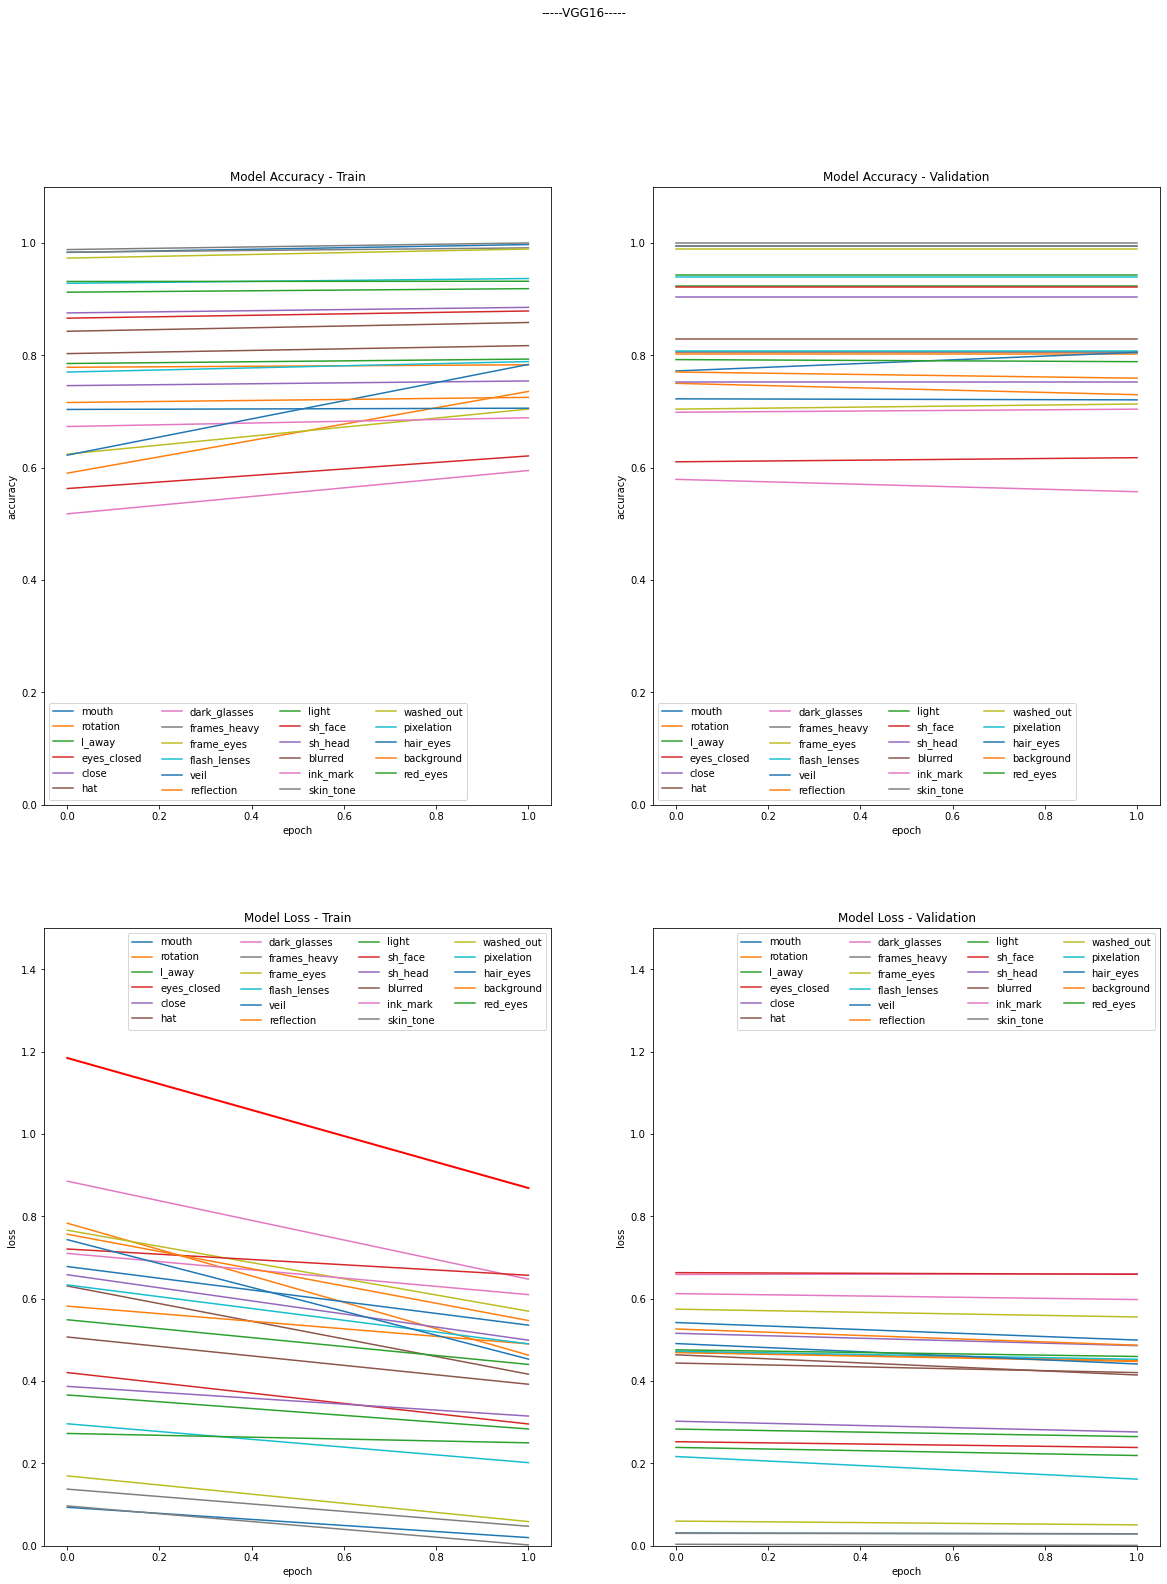

In [14]:
runner.draw_training_history()

# Load Best Model

In [15]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Not saving model!


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
18/18 [==============================] - 33s 2s/step
Prediction finished!
Requisite: MOUTH


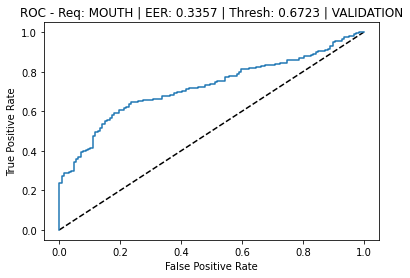

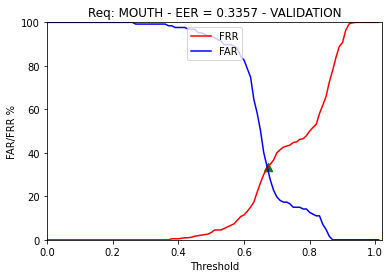

Requisite: MOUTH - EER_interp: 33.57% - Best Threshold: 0.6723202845879963
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.38      0.67      0.48       127
    COMPLIANT       0.87      0.66      0.75       420

     accuracy                           0.67       547
    macro avg       0.62      0.67      0.62       547
 weighted avg       0.75      0.67      0.69       547

Confusion matrix ----------------------------------------
FAR: 33.07% | FRR: 33.57% | EER_mean: 33.32% | TP: 279 | TN: 85 | FP: 42 | FN: 141
Accuracy ------------------------------------------------
Model Accuracy: 66.53999999999999%
---------------------------------------------------------
Requisite: ROTATION


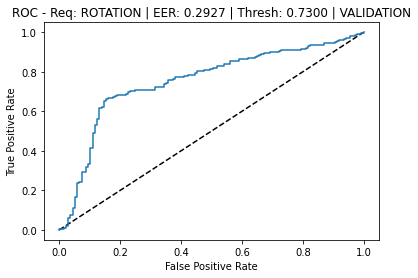

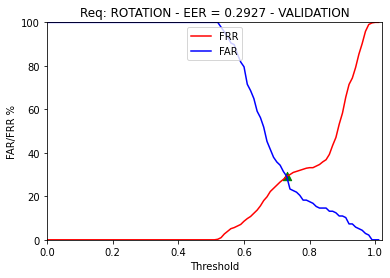

Requisite: ROTATION - EER_interp: 29.270000000000003% - Best Threshold: 0.730011790263944
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.45      0.71      0.55       137
    COMPLIANT       0.88      0.71      0.78       410

     accuracy                           0.71       547
    macro avg       0.66      0.71      0.67       547
 weighted avg       0.77      0.71      0.72       547

Confusion matrix ----------------------------------------
FAR: 29.2% | FRR: 29.270000000000003% | EER_mean: 29.24% | TP: 290 | TN: 97 | FP: 40 | FN: 120
Accuracy ------------------------------------------------
Model Accuracy: 70.75%
---------------------------------------------------------
Requisite: L_AWAY


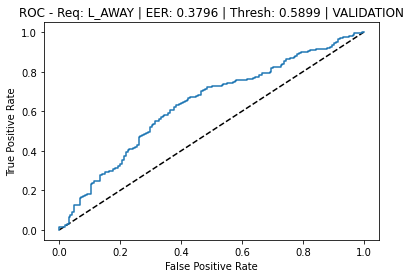

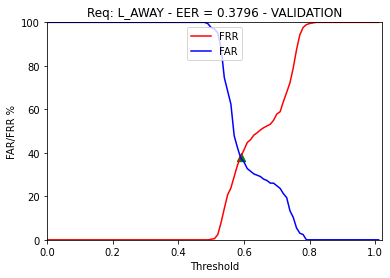

Requisite: L_AWAY - EER_interp: 37.96% - Best Threshold: 0.5898901370807468
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.42      0.62      0.50       165
    COMPLIANT       0.79      0.62      0.70       382

     accuracy                           0.62       547
    macro avg       0.60      0.62      0.60       547
 weighted avg       0.68      0.62      0.64       547

Confusion matrix ----------------------------------------
FAR: 37.580000000000005% | FRR: 37.96% | EER_mean: 37.769999999999996% | TP: 237 | TN: 103 | FP: 62 | FN: 145
Accuracy ------------------------------------------------
Model Accuracy: 62.160000000000004%
---------------------------------------------------------
Requisite: EYES_CLOSED


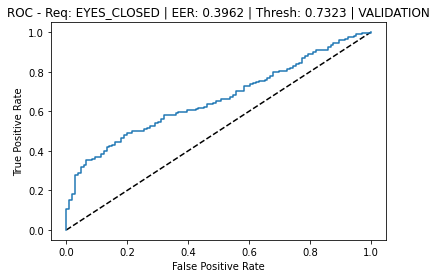

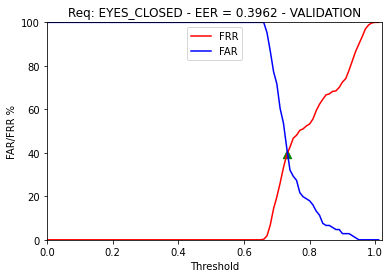

Requisite: EYES_CLOSED - EER_interp: 39.62% - Best Threshold: 0.7322899699210744
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.27      0.60      0.37       106
    COMPLIANT       0.86      0.61      0.71       441

     accuracy                           0.61       547
    macro avg       0.57      0.61      0.54       547
 weighted avg       0.75      0.61      0.65       547

Confusion matrix ----------------------------------------
FAR: 39.62% | FRR: 39.23% | EER_mean: 39.42% | TP: 268 | TN: 64 | FP: 42 | FN: 173
Accuracy ------------------------------------------------
Model Accuracy: 60.69%
---------------------------------------------------------
Requisite: CLOSE


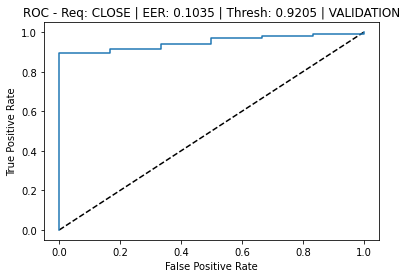

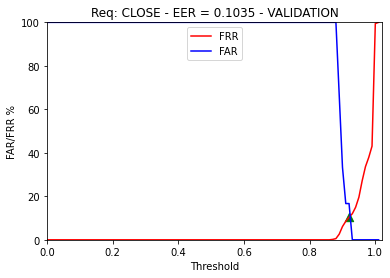

Requisite: CLOSE - EER_interp: 10.35% - Best Threshold: 0.9204998187128582
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.10      1.00      0.18         6
    COMPLIANT       1.00      0.90      0.95       541

     accuracy                           0.90       547
    macro avg       0.55      0.95      0.56       547
 weighted avg       0.99      0.90      0.94       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 10.35% | EER_mean: 5.18% | TP: 485 | TN: 6 | FP: 0 | FN: 56
Accuracy ------------------------------------------------
Model Accuracy: 89.75999999999999%
---------------------------------------------------------
Requisite: HAT


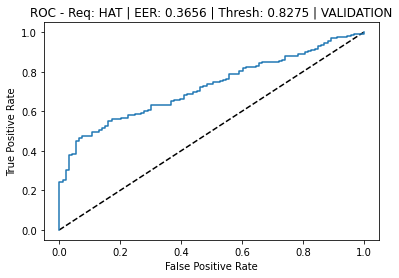

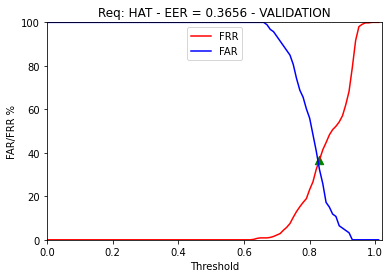

Requisite: HAT - EER_interp: 36.559999999999995% - Best Threshold: 0.827458858490014
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.26      0.63      0.37        93
    COMPLIANT       0.89      0.63      0.74       454

     accuracy                           0.63       547
    macro avg       0.58      0.63      0.56       547
 weighted avg       0.79      0.63      0.68       547

Confusion matrix ----------------------------------------
FAR: 36.559999999999995% | FRR: 36.559999999999995% | EER_mean: 36.559999999999995% | TP: 288 | TN: 59 | FP: 34 | FN: 166
Accuracy ------------------------------------------------
Model Accuracy: 63.44%
---------------------------------------------------------
Requisite: DARK_GLASSES


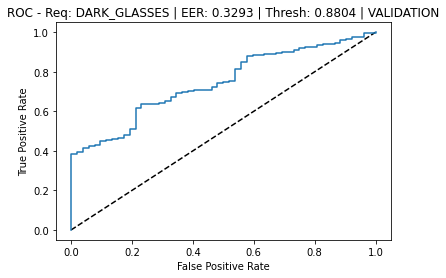

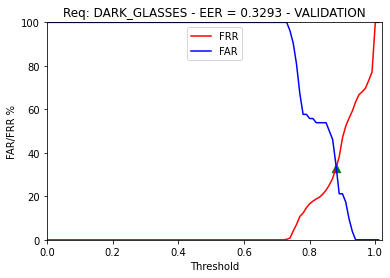

Requisite: DARK_GLASSES - EER_interp: 32.93% - Best Threshold: 0.8803827076247249
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.18      0.67      0.28        52
    COMPLIANT       0.95      0.67      0.79       495

     accuracy                           0.67       547
    macro avg       0.56      0.67      0.53       547
 weighted avg       0.88      0.67      0.74       547

Confusion matrix ----------------------------------------
FAR: 32.690000000000005% | FRR: 32.93% | EER_mean: 32.81% | TP: 332 | TN: 35 | FP: 17 | FN: 163
Accuracy ------------------------------------------------
Model Accuracy: 67.09%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


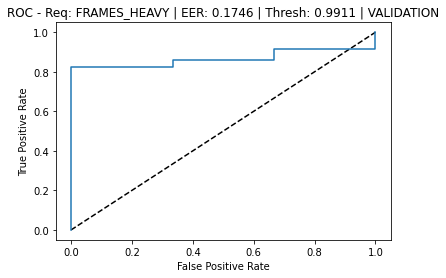

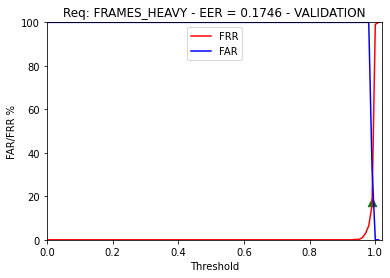

Requisite: FRAMES_HEAVY - EER_interp: 17.46% - Best Threshold: 0.9910910975407151
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.03      1.00      0.06         3
    COMPLIANT       1.00      0.83      0.90       544

     accuracy                           0.83       547
    macro avg       0.52      0.91      0.48       547
 weighted avg       0.99      0.83      0.90       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 17.46% | EER_mean: 8.73% | TP: 449 | TN: 3 | FP: 0 | FN: 95
Accuracy ------------------------------------------------
Model Accuracy: 82.63000000000001%
---------------------------------------------------------
Requisite: FRAME_EYES


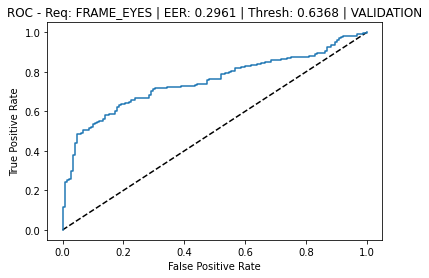

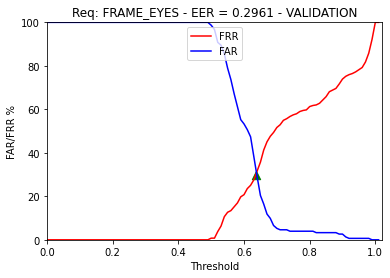

Requisite: FRAME_EYES - EER_interp: 29.609999999999996% - Best Threshold: 0.636825025081692
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.48      0.70      0.57       152
    COMPLIANT       0.86      0.70      0.77       395

     accuracy                           0.70       547
    macro avg       0.67      0.70      0.67       547
 weighted avg       0.75      0.70      0.72       547

Confusion matrix ----------------------------------------
FAR: 29.609999999999996% | FRR: 29.87% | EER_mean: 29.74% | TP: 277 | TN: 107 | FP: 45 | FN: 118
Accuracy ------------------------------------------------
Model Accuracy: 70.19999999999999%
---------------------------------------------------------
Requisite: FLASH_LENSES


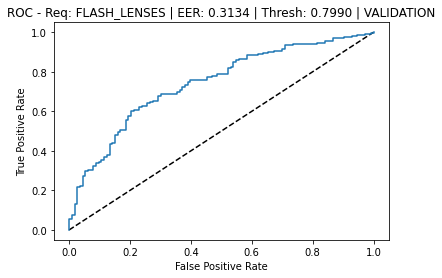

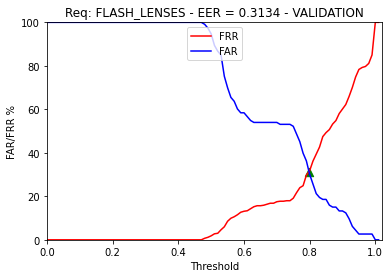

Requisite: FLASH_LENSES - EER_interp: 31.34% - Best Threshold: 0.7989640222167027
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.37      0.70      0.48       113
    COMPLIANT       0.90      0.69      0.78       434

     accuracy                           0.69       547
    macro avg       0.63      0.69      0.63       547
 weighted avg       0.79      0.69      0.72       547

Confusion matrix ----------------------------------------
FAR: 30.09% | FRR: 31.34% | EER_mean: 30.72% | TP: 298 | TN: 79 | FP: 34 | FN: 136
Accuracy ------------------------------------------------
Model Accuracy: 68.92%
---------------------------------------------------------
Requisite: VEIL


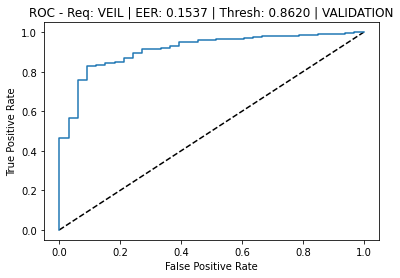

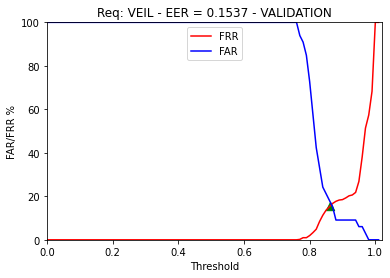

Requisite: VEIL - EER_interp: 15.370000000000001% - Best Threshold: 0.8620365265510426
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.26      0.85      0.40        33
    COMPLIANT       0.99      0.85      0.91       514

     accuracy                           0.85       547
    macro avg       0.63      0.85      0.66       547
 weighted avg       0.94      0.85      0.88       547

Confusion matrix ----------------------------------------
FAR: 15.15% | FRR: 15.370000000000001% | EER_mean: 15.260000000000002% | TP: 435 | TN: 28 | FP: 5 | FN: 79
Accuracy ------------------------------------------------
Model Accuracy: 84.64%
---------------------------------------------------------
Requisite: REFLECTION


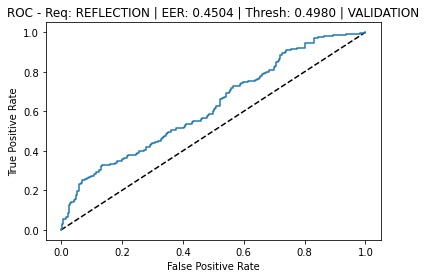

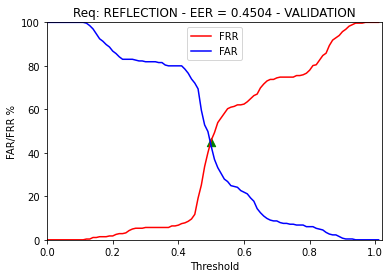

Requisite: REFLECTION - EER_interp: 45.04% - Best Threshold: 0.49801533854176766
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.54      0.55      0.55       265
    COMPLIANT       0.57      0.55      0.56       282

     accuracy                           0.55       547
    macro avg       0.55      0.55      0.55       547
 weighted avg       0.55      0.55      0.55       547

Confusion matrix ----------------------------------------
FAR: 44.529999999999994% | FRR: 45.04% | EER_mean: 44.78% | TP: 155 | TN: 147 | FP: 118 | FN: 127
Accuracy ------------------------------------------------
Model Accuracy: 55.21%
---------------------------------------------------------
Requisite: LIGHT


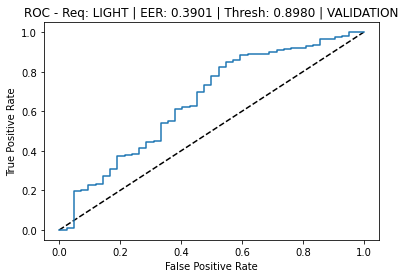

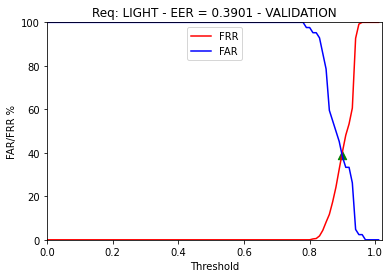

Requisite: LIGHT - EER_interp: 39.01% - Best Threshold: 0.8979865059994235
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.12      0.62      0.20        42
    COMPLIANT       0.95      0.61      0.74       505

     accuracy                           0.61       547
    macro avg       0.53      0.61      0.47       547
 weighted avg       0.89      0.61      0.70       547

Confusion matrix ----------------------------------------
FAR: 38.1% | FRR: 39.01% | EER_mean: 38.56% | TP: 308 | TN: 26 | FP: 16 | FN: 197
Accuracy ------------------------------------------------
Model Accuracy: 61.06%
---------------------------------------------------------
Requisite: SH_FACE


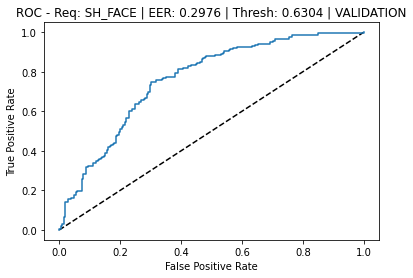

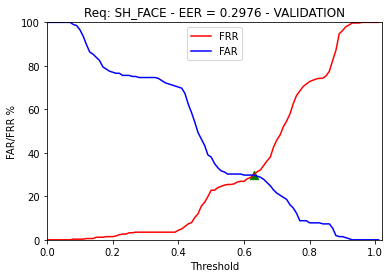

Requisite: SH_FACE - EER_interp: 29.759999999999998% - Best Threshold: 0.6303911209115223
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.58      0.70      0.64       205
    COMPLIANT       0.80      0.70      0.74       342

     accuracy                           0.70       547
    macro avg       0.69      0.70      0.69       547
 weighted avg       0.72      0.70      0.70       547

Confusion matrix ----------------------------------------
FAR: 29.759999999999998% | FRR: 30.12% | EER_mean: 29.94% | TP: 239 | TN: 144 | FP: 61 | FN: 103
Accuracy ------------------------------------------------
Model Accuracy: 70.02000000000001%
---------------------------------------------------------
Requisite: SH_HEAD


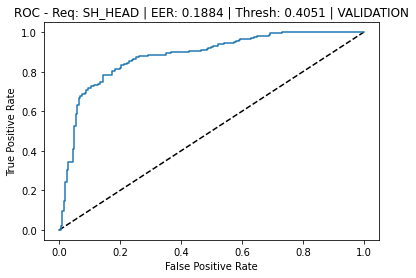

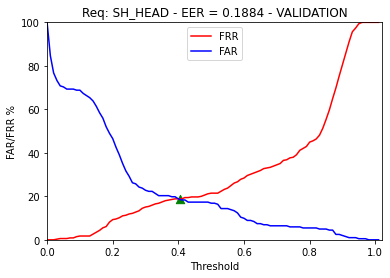

Requisite: SH_HEAD - EER_interp: 18.84% - Best Threshold: 0.4050885863635666
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.72      0.81      0.76       202
    COMPLIANT       0.88      0.81      0.84       345

     accuracy                           0.81       547
    macro avg       0.80      0.81      0.80       547
 weighted avg       0.82      0.81      0.81       547

Confusion matrix ----------------------------------------
FAR: 18.81% | FRR: 18.84% | EER_mean: 18.82% | TP: 280 | TN: 164 | FP: 38 | FN: 65
Accuracy ------------------------------------------------
Model Accuracy: 81.17%
---------------------------------------------------------
Requisite: BLURRED


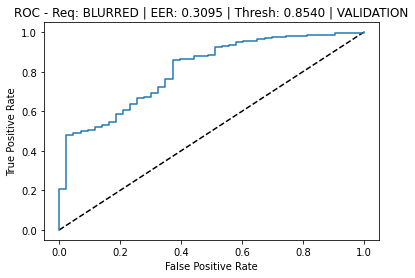

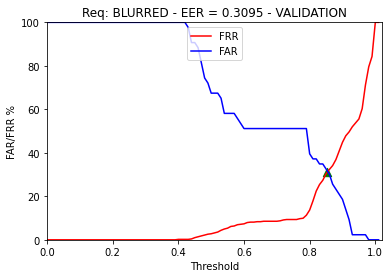

Requisite: BLURRED - EER_interp: 30.95% - Best Threshold: 0.8540203273296177
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.16      0.70      0.26        43
    COMPLIANT       0.96      0.69      0.80       504

     accuracy                           0.69       547
    macro avg       0.56      0.69      0.53       547
 weighted avg       0.90      0.69      0.76       547

Confusion matrix ----------------------------------------
FAR: 30.23% | FRR: 30.95% | EER_mean: 30.59% | TP: 348 | TN: 30 | FP: 13 | FN: 156
Accuracy ------------------------------------------------
Model Accuracy: 69.1%
---------------------------------------------------------
Requisite: SKIN_TONE


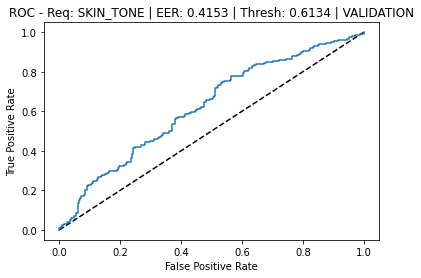

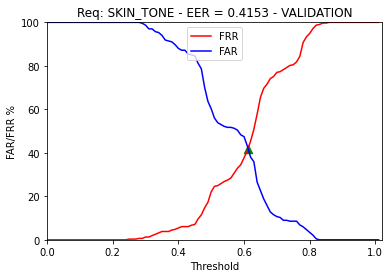

Requisite: SKIN_TONE - EER_interp: 41.53% - Best Threshold: 0.6133618743909678
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.51      0.59      0.55       234
    COMPLIANT       0.65      0.58      0.62       313

     accuracy                           0.59       547
    macro avg       0.58      0.59      0.58       547
 weighted avg       0.59      0.59      0.59       547

Confusion matrix ----------------------------------------
FAR: 41.449999999999996% | FRR: 41.53% | EER_mean: 41.49% | TP: 183 | TN: 137 | FP: 97 | FN: 130
Accuracy ------------------------------------------------
Model Accuracy: 58.5%
---------------------------------------------------------
Requisite: WASHED_OUT


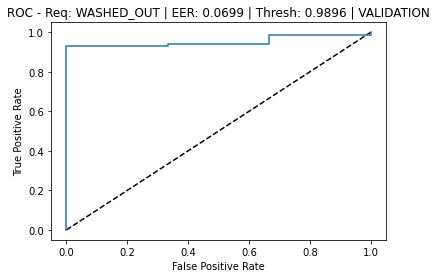

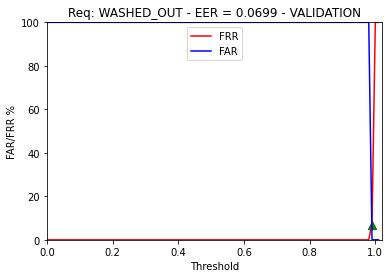

Requisite: WASHED_OUT - EER_interp: 6.99% - Best Threshold: 0.9896090420729974
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.07      1.00      0.14         3
    COMPLIANT       1.00      0.93      0.96       544

     accuracy                           0.93       547
    macro avg       0.54      0.97      0.55       547
 weighted avg       0.99      0.93      0.96       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 6.99% | EER_mean: 3.5000000000000004% | TP: 506 | TN: 3 | FP: 0 | FN: 38
Accuracy ------------------------------------------------
Model Accuracy: 93.05%
---------------------------------------------------------
Requisite: PIXELATION


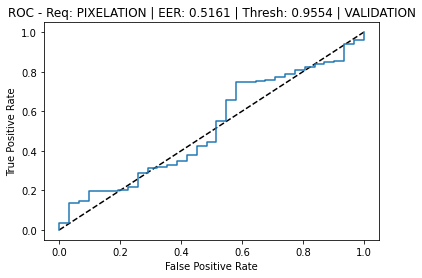

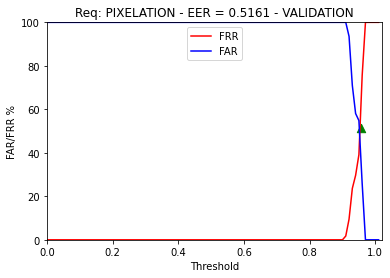

Requisite: PIXELATION - EER_interp: 51.61% - Best Threshold: 0.9554193019866944
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.05      0.48      0.09        31
    COMPLIANT       0.93      0.45      0.60       516

     accuracy                           0.45       547
    macro avg       0.49      0.46      0.35       547
 weighted avg       0.88      0.45      0.57       547

Confusion matrix ----------------------------------------
FAR: 51.61% | FRR: 55.43% | EER_mean: 53.52% | TP: 230 | TN: 15 | FP: 16 | FN: 286
Accuracy ------------------------------------------------
Model Accuracy: 44.79%
---------------------------------------------------------
Requisite: HAIR_EYES


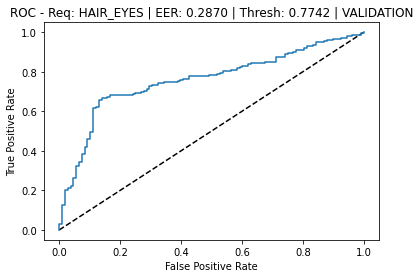

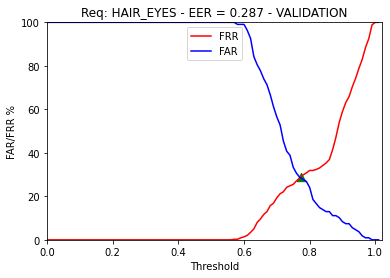

Requisite: HAIR_EYES - EER_interp: 28.7% - Best Threshold: 0.774237453937224
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.38      0.71      0.50       108
    COMPLIANT       0.91      0.72      0.80       439

     accuracy                           0.71       547
    macro avg       0.65      0.71      0.65       547
 weighted avg       0.81      0.71      0.74       547

Confusion matrix ----------------------------------------
FAR: 28.7% | FRR: 28.470000000000002% | EER_mean: 28.58% | TP: 314 | TN: 77 | FP: 31 | FN: 125
Accuracy ------------------------------------------------
Model Accuracy: 71.48%
---------------------------------------------------------
Requisite: BACKGROUND


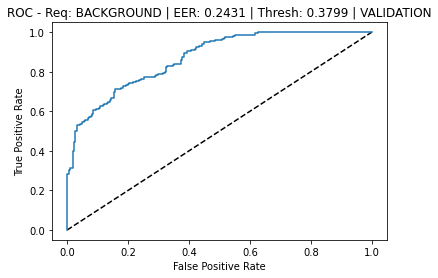

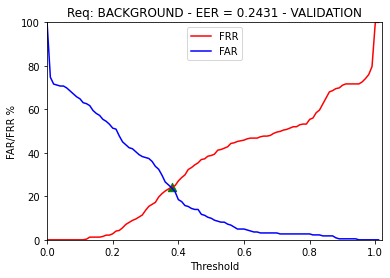

Requisite: BACKGROUND - EER_interp: 24.310000000000002% - Best Threshold: 0.3799397543760456
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.68      0.76      0.72       222
    COMPLIANT       0.82      0.76      0.79       325

     accuracy                           0.76       547
    macro avg       0.75      0.76      0.75       547
 weighted avg       0.77      0.76      0.76       547

Confusion matrix ----------------------------------------
FAR: 23.87% | FRR: 24.310000000000002% | EER_mean: 24.09% | TP: 246 | TN: 169 | FP: 53 | FN: 79
Accuracy ------------------------------------------------
Model Accuracy: 75.87%
---------------------------------------------------------
Requisite: RED_EYES


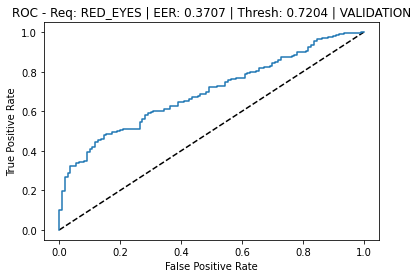

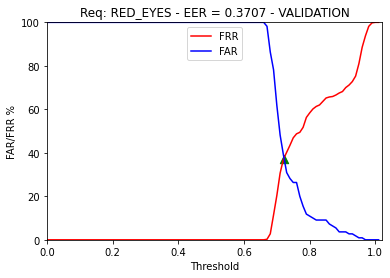

Requisite: RED_EYES - EER_interp: 37.07% - Best Threshold: 0.7203710703427877
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.30      0.64      0.41       110
    COMPLIANT       0.87      0.63      0.73       437

     accuracy                           0.63       547
    macro avg       0.59      0.63      0.57       547
 weighted avg       0.76      0.63      0.67       547

Confusion matrix ----------------------------------------
FAR: 36.36% | FRR: 37.07% | EER_mean: 36.71% | TP: 275 | TN: 70 | FP: 40 | FN: 162
Accuracy ------------------------------------------------
Model Accuracy: 63.07000000000001%
---------------------------------------------------------


In [17]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 18s 2s/step
Prediction finished!
Requisite: MOUTH


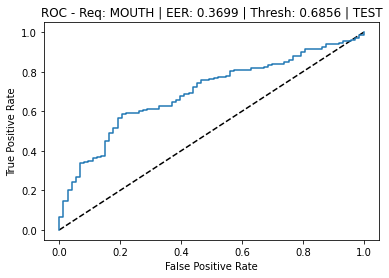

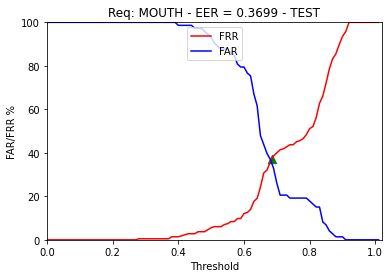

Requisite: MOUTH - EER_interp: 36.99% - Best Threshold: 0.6855508089065839
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.37      0.63      0.46        73
    COMPLIANT       0.83      0.63      0.72       215

     accuracy                           0.63       288
    macro avg       0.60      0.63      0.59       288
 weighted avg       0.71      0.63      0.65       288

Confusion matrix ----------------------------------------
FAR: 36.99% | FRR: 37.21% | EER_mean: 37.1% | TP: 135 | TN: 46 | FP: 27 | FN: 80
Accuracy ------------------------------------------------
Model Accuracy: 62.849999999999994%
---------------------------------------------------------
Requisite: ROTATION


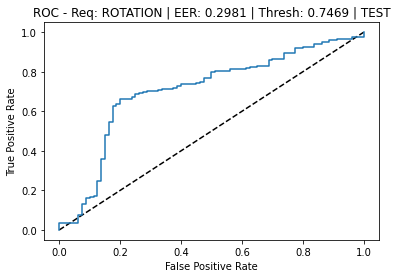

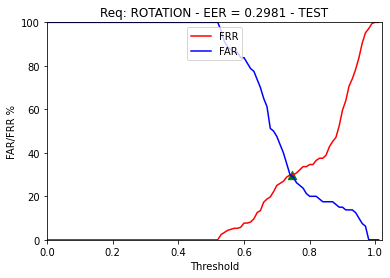

Requisite: ROTATION - EER_interp: 29.81% - Best Threshold: 0.7469193782561865
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.48      0.71      0.57        80
    COMPLIANT       0.86      0.70      0.77       208

     accuracy                           0.70       288
    macro avg       0.67      0.71      0.67       288
 weighted avg       0.76      0.70      0.72       288

Confusion matrix ----------------------------------------
FAR: 28.749999999999996% | FRR: 29.81% | EER_mean: 29.28% | TP: 146 | TN: 57 | FP: 23 | FN: 62
Accuracy ------------------------------------------------
Model Accuracy: 70.49%
---------------------------------------------------------
Requisite: L_AWAY


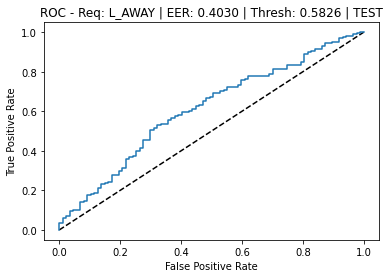

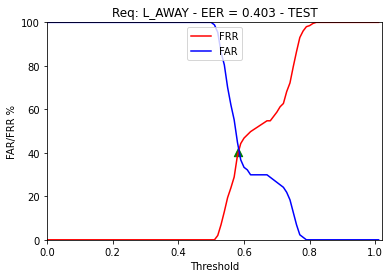

Requisite: L_AWAY - EER_interp: 40.300000000000004% - Best Threshold: 0.5825681819844601
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.39      0.60      0.47        87
    COMPLIANT       0.77      0.60      0.67       201

     accuracy                           0.60       288
    macro avg       0.58      0.60      0.57       288
 weighted avg       0.66      0.60      0.61       288

Confusion matrix ----------------------------------------
FAR: 40.23% | FRR: 40.300000000000004% | EER_mean: 40.26% | TP: 120 | TN: 52 | FP: 35 | FN: 81
Accuracy ------------------------------------------------
Model Accuracy: 59.72%
---------------------------------------------------------
Requisite: EYES_CLOSED


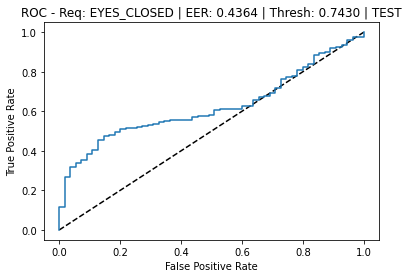

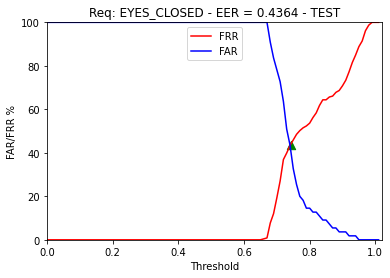

Requisite: EYES_CLOSED - EER_interp: 43.64% - Best Threshold: 0.743023216724419
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.23      0.56      0.33        55
    COMPLIANT       0.84      0.56      0.67       233

     accuracy                           0.56       288
    macro avg       0.54      0.56      0.50       288
 weighted avg       0.73      0.56      0.61       288

Confusion matrix ----------------------------------------
FAR: 43.64% | FRR: 44.21% | EER_mean: 43.919999999999995% | TP: 130 | TN: 31 | FP: 24 | FN: 103
Accuracy ------------------------------------------------
Model Accuracy: 55.900000000000006%
---------------------------------------------------------
Requisite: CLOSE


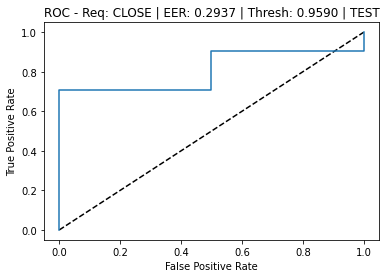

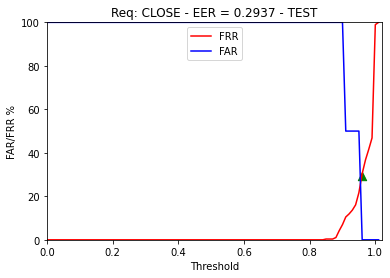

Requisite: CLOSE - EER_interp: 29.37% - Best Threshold: 0.9590124208610374
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.02      1.00      0.05         2
    COMPLIANT       1.00      0.71      0.83       286

     accuracy                           0.71       288
    macro avg       0.51      0.85      0.44       288
 weighted avg       0.99      0.71      0.82       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 29.37% | EER_mean: 14.680000000000001% | TP: 202 | TN: 2 | FP: 0 | FN: 84
Accuracy ------------------------------------------------
Model Accuracy: 70.83%
---------------------------------------------------------
Requisite: HAT


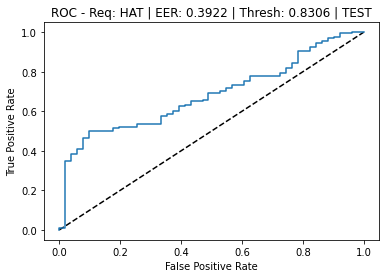

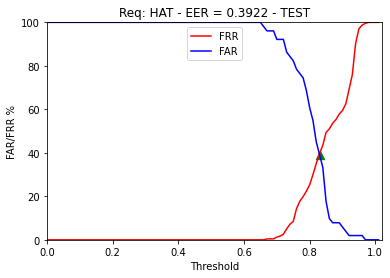

Requisite: HAT - EER_interp: 39.22% - Best Threshold: 0.8305600285530516
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.25      0.61      0.35        51
    COMPLIANT       0.88      0.60      0.71       237

     accuracy                           0.60       288
    macro avg       0.56      0.60      0.53       288
 weighted avg       0.76      0.60      0.65       288

Confusion matrix ----------------------------------------
FAR: 39.22% | FRR: 40.08% | EER_mean: 39.65% | TP: 142 | TN: 31 | FP: 20 | FN: 95
Accuracy ------------------------------------------------
Model Accuracy: 60.07%
---------------------------------------------------------
Requisite: DARK_GLASSES


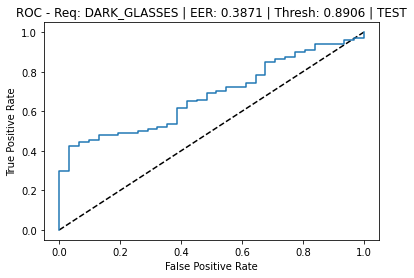

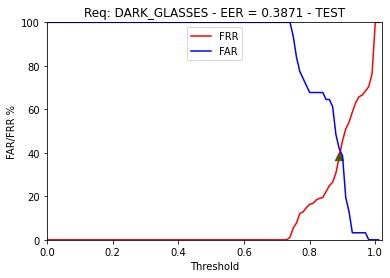

Requisite: DARK_GLASSES - EER_interp: 38.71% - Best Threshold: 0.8906198740005491
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.16      0.61      0.26        31
    COMPLIANT       0.93      0.61      0.74       257

     accuracy                           0.61       288
    macro avg       0.55      0.61      0.50       288
 weighted avg       0.85      0.61      0.69       288

Confusion matrix ----------------------------------------
FAR: 38.71% | FRR: 38.519999999999996% | EER_mean: 38.62% | TP: 158 | TN: 19 | FP: 12 | FN: 99
Accuracy ------------------------------------------------
Model Accuracy: 61.46%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


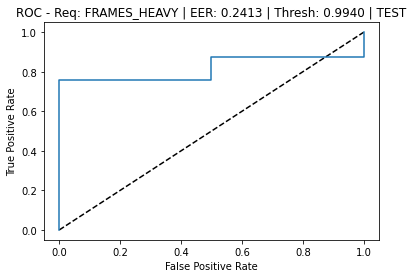

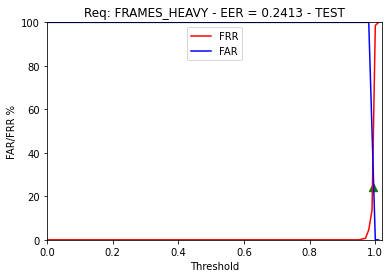

Requisite: FRAMES_HEAVY - EER_interp: 24.13% - Best Threshold: 0.993986949220404
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.03      1.00      0.05         2
    COMPLIANT       1.00      0.76      0.86       286

     accuracy                           0.76       288
    macro avg       0.51      0.88      0.46       288
 weighted avg       0.99      0.76      0.86       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 24.13% | EER_mean: 12.06% | TP: 217 | TN: 2 | FP: 0 | FN: 69
Accuracy ------------------------------------------------
Model Accuracy: 76.03999999999999%
---------------------------------------------------------
Requisite: FRAME_EYES


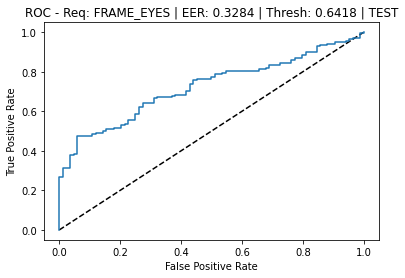

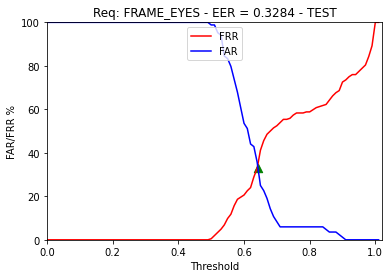

Requisite: FRAME_EYES - EER_interp: 32.84% - Best Threshold: 0.6418141214286579
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.46      0.67      0.54        84
    COMPLIANT       0.83      0.67      0.74       204

     accuracy                           0.67       288
    macro avg       0.64      0.67      0.64       288
 weighted avg       0.72      0.67      0.68       288

Confusion matrix ----------------------------------------
FAR: 33.33% | FRR: 32.84% | EER_mean: 33.08% | TP: 137 | TN: 56 | FP: 28 | FN: 67
Accuracy ------------------------------------------------
Model Accuracy: 67.01%
---------------------------------------------------------
Requisite: FLASH_LENSES


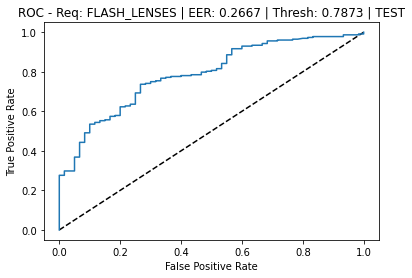

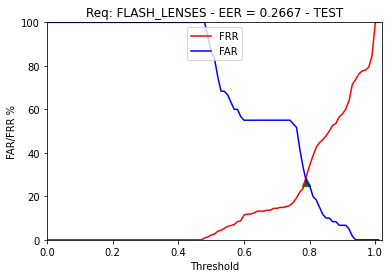

Requisite: FLASH_LENSES - EER_interp: 26.669999999999998% - Best Threshold: 0.7873456478118877
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.42      0.73      0.54        60
    COMPLIANT       0.91      0.74      0.82       228

     accuracy                           0.74       288
    macro avg       0.67      0.74      0.68       288
 weighted avg       0.81      0.74      0.76       288

Confusion matrix ----------------------------------------
FAR: 26.669999999999998% | FRR: 26.32% | EER_mean: 26.5% | TP: 168 | TN: 44 | FP: 16 | FN: 60
Accuracy ------------------------------------------------
Model Accuracy: 73.61%
---------------------------------------------------------
Requisite: VEIL


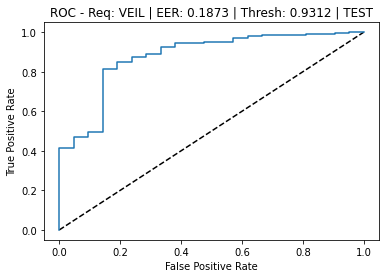

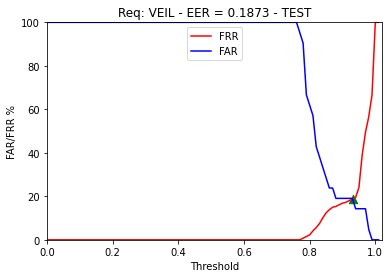

Requisite: VEIL - EER_interp: 18.73% - Best Threshold: 0.9312295444895758
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.26      0.86      0.40        21
    COMPLIANT       0.99      0.81      0.89       267

     accuracy                           0.82       288
    macro avg       0.63      0.83      0.65       288
 weighted avg       0.93      0.82      0.86       288

Confusion matrix ----------------------------------------
FAR: 14.29% | FRR: 18.73% | EER_mean: 16.509999999999998% | TP: 217 | TN: 18 | FP: 3 | FN: 50
Accuracy ------------------------------------------------
Model Accuracy: 81.6%
---------------------------------------------------------
Requisite: REFLECTION


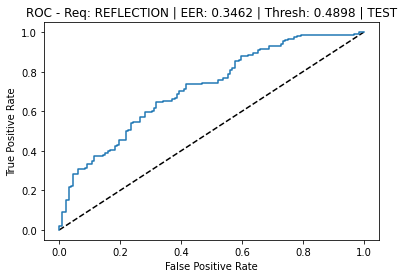

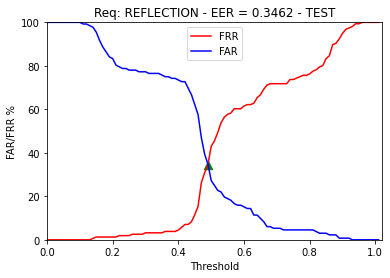

Requisite: REFLECTION - EER_interp: 34.62% - Best Threshold: 0.4897646829485893
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.61      0.65      0.63       132
    COMPLIANT       0.69      0.65      0.67       156

     accuracy                           0.65       288
    macro avg       0.65      0.65      0.65       288
 weighted avg       0.65      0.65      0.65       288

Confusion matrix ----------------------------------------
FAR: 34.849999999999994% | FRR: 34.62% | EER_mean: 34.74% | TP: 102 | TN: 86 | FP: 46 | FN: 54
Accuracy ------------------------------------------------
Model Accuracy: 65.28%
---------------------------------------------------------
Requisite: LIGHT


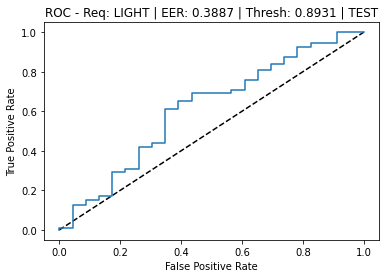

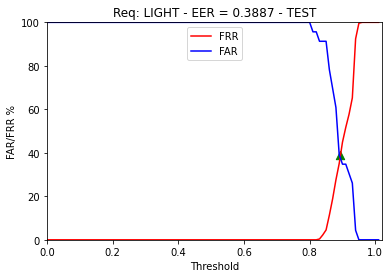

Requisite: LIGHT - EER_interp: 38.87% - Best Threshold: 0.8931134556824306
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.13      0.65      0.21        23
    COMPLIANT       0.95      0.61      0.74       265

     accuracy                           0.61       288
    macro avg       0.54      0.63      0.48       288
 weighted avg       0.89      0.61      0.70       288

Confusion matrix ----------------------------------------
FAR: 34.78% | FRR: 38.87% | EER_mean: 36.82% | TP: 162 | TN: 15 | FP: 8 | FN: 103
Accuracy ------------------------------------------------
Model Accuracy: 61.46%
---------------------------------------------------------
Requisite: SH_FACE


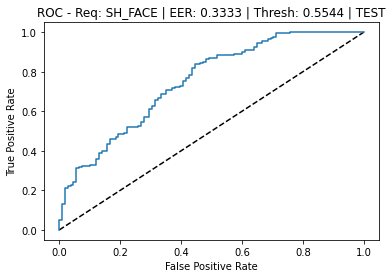

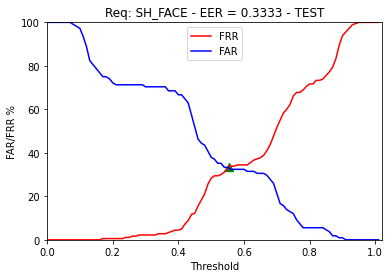

Requisite: SH_FACE - EER_interp: 33.33% - Best Threshold: 0.5543687939644029
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.55      0.67      0.60       108
    COMPLIANT       0.77      0.67      0.71       180

     accuracy                           0.67       288
    macro avg       0.66      0.67      0.66       288
 weighted avg       0.69      0.67      0.67       288

Confusion matrix ----------------------------------------
FAR: 33.33% | FRR: 33.33% | EER_mean: 33.33% | TP: 120 | TN: 72 | FP: 36 | FN: 60
Accuracy ------------------------------------------------
Model Accuracy: 66.67%
---------------------------------------------------------
Requisite: SH_HEAD


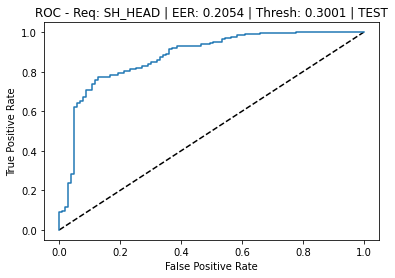

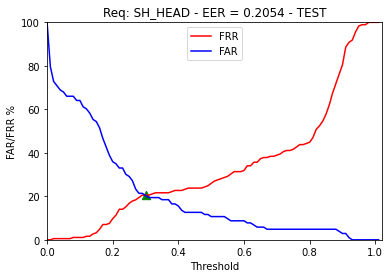

Requisite: SH_HEAD - EER_interp: 20.54% - Best Threshold: 0.30009638264372224
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.68      0.80      0.74       103
    COMPLIANT       0.88      0.79      0.83       185

     accuracy                           0.80       288
    macro avg       0.78      0.80      0.78       288
 weighted avg       0.81      0.80      0.80       288

Confusion matrix ----------------------------------------
FAR: 20.39% | FRR: 20.54% | EER_mean: 20.46% | TP: 147 | TN: 82 | FP: 21 | FN: 38
Accuracy ------------------------------------------------
Model Accuracy: 79.51%
---------------------------------------------------------
Requisite: BLURRED


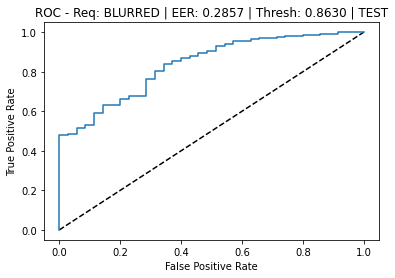

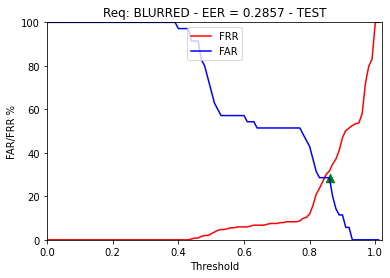

Requisite: BLURRED - EER_interp: 28.57% - Best Threshold: 0.8629732131958198
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.24      0.71      0.35        35
    COMPLIANT       0.95      0.68      0.79       253

     accuracy                           0.68       288
    macro avg       0.59      0.70      0.57       288
 weighted avg       0.86      0.68      0.74       288

Confusion matrix ----------------------------------------
FAR: 28.57% | FRR: 32.019999999999996% | EER_mean: 30.3% | TP: 172 | TN: 25 | FP: 10 | FN: 81
Accuracy ------------------------------------------------
Model Accuracy: 68.4%
---------------------------------------------------------
Requisite: SKIN_TONE


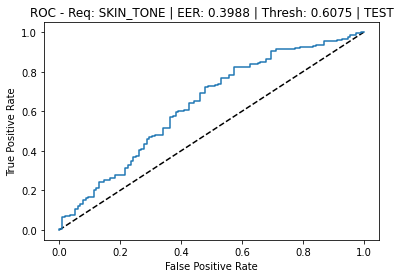

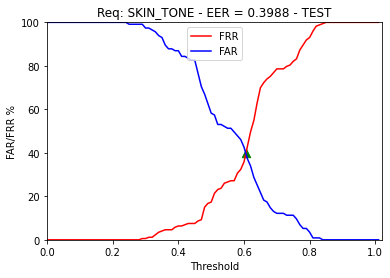

Requisite: SKIN_TONE - EER_interp: 39.879999999999995% - Best Threshold: 0.6074625036619742
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.50      0.61      0.55       115
    COMPLIANT       0.70      0.60      0.65       173

     accuracy                           0.60       288
    macro avg       0.60      0.60      0.60       288
 weighted avg       0.62      0.60      0.61       288

Confusion matrix ----------------------------------------
FAR: 39.129999999999995% | FRR: 39.879999999999995% | EER_mean: 39.5% | TP: 104 | TN: 70 | FP: 45 | FN: 69
Accuracy ------------------------------------------------
Model Accuracy: 60.419999999999995%
---------------------------------------------------------
Requisite: WASHED_OUT


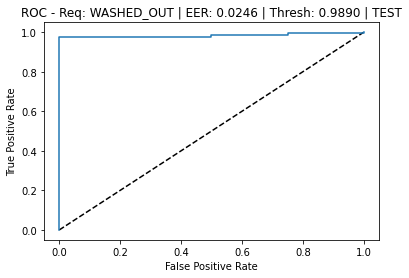

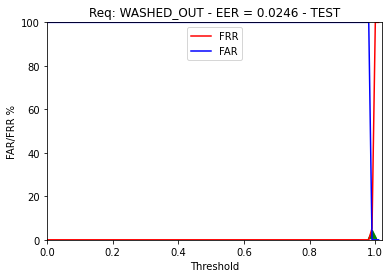

Requisite: WASHED_OUT - EER_interp: 2.46% - Best Threshold: 0.9889924026710887
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.30      0.75      0.43         4
    COMPLIANT       1.00      0.98      0.99       284

     accuracy                           0.97       288
    macro avg       0.65      0.86      0.71       288
 weighted avg       0.99      0.97      0.98       288

Confusion matrix ----------------------------------------
FAR: 25.0% | FRR: 2.46% | EER_mean: 13.73% | TP: 277 | TN: 3 | FP: 1 | FN: 7
Accuracy ------------------------------------------------
Model Accuracy: 97.22%
---------------------------------------------------------
Requisite: PIXELATION


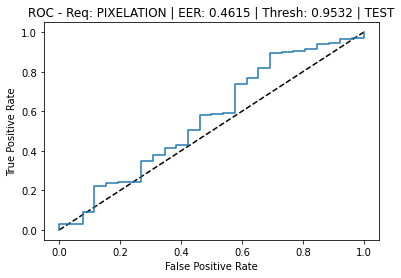

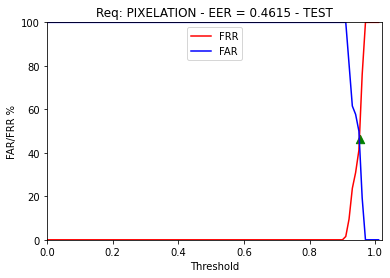

Requisite: PIXELATION - EER_interp: 46.150000000000006% - Best Threshold: 0.9532409310340912
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.10      0.54      0.17        26
    COMPLIANT       0.92      0.51      0.65       262

     accuracy                           0.51       288
    macro avg       0.51      0.52      0.41       288
 weighted avg       0.84      0.51      0.61       288

Confusion matrix ----------------------------------------
FAR: 46.150000000000006% | FRR: 49.24% | EER_mean: 47.699999999999996% | TP: 133 | TN: 14 | FP: 12 | FN: 129
Accuracy ------------------------------------------------
Model Accuracy: 51.04%
---------------------------------------------------------
Requisite: HAIR_EYES


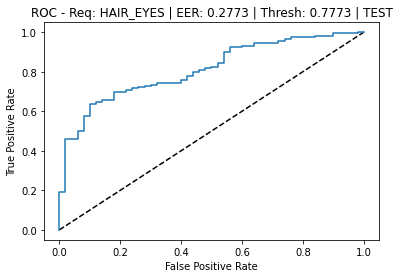

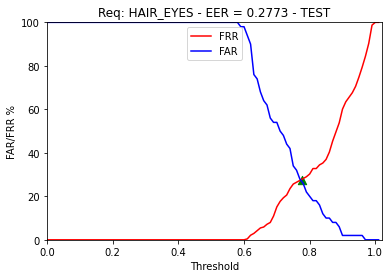

Requisite: HAIR_EYES - EER_interp: 27.73% - Best Threshold: 0.7773478527029022
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.36      0.74      0.48        50
    COMPLIANT       0.93      0.72      0.81       238

     accuracy                           0.73       288
    macro avg       0.64      0.73      0.65       288
 weighted avg       0.83      0.73      0.76       288

Confusion matrix ----------------------------------------
FAR: 26.0% | FRR: 27.73% | EER_mean: 26.86% | TP: 172 | TN: 37 | FP: 13 | FN: 66
Accuracy ------------------------------------------------
Model Accuracy: 72.57000000000001%
---------------------------------------------------------
Requisite: BACKGROUND


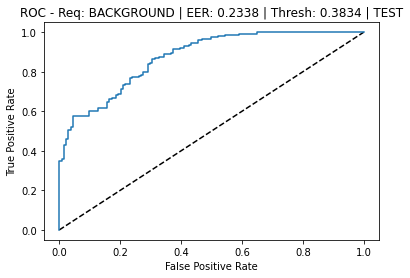

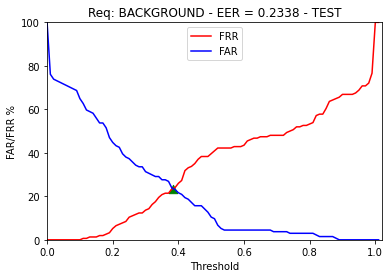

Requisite: BACKGROUND - EER_interp: 23.380000000000003% - Best Threshold: 0.3834495637323949
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.74      0.77      0.75       134
    COMPLIANT       0.79      0.77      0.78       154

     accuracy                           0.77       288
    macro avg       0.77      0.77      0.77       288
 weighted avg       0.77      0.77      0.77       288

Confusion matrix ----------------------------------------
FAR: 23.13% | FRR: 23.380000000000003% | EER_mean: 23.26% | TP: 118 | TN: 103 | FP: 31 | FN: 36
Accuracy ------------------------------------------------
Model Accuracy: 76.74%
---------------------------------------------------------
Requisite: RED_EYES


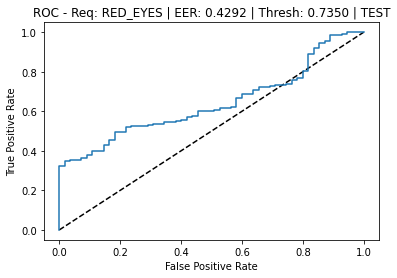

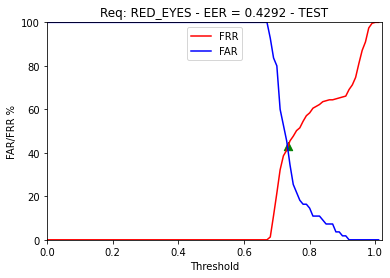

Requisite: RED_EYES - EER_interp: 42.92% - Best Threshold: 0.7350189596286659
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.24      0.58      0.34        55
    COMPLIANT       0.85      0.57      0.68       233

     accuracy                           0.57       288
    macro avg       0.55      0.58      0.51       288
 weighted avg       0.74      0.57      0.62       288

Confusion matrix ----------------------------------------
FAR: 41.82% | FRR: 42.92% | EER_mean: 42.370000000000005% | TP: 133 | TN: 32 | FP: 23 | FN: 100
Accuracy ------------------------------------------------
Model Accuracy: 57.29%
---------------------------------------------------------


In [18]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [19]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Not using Neptune
